# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [ ]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


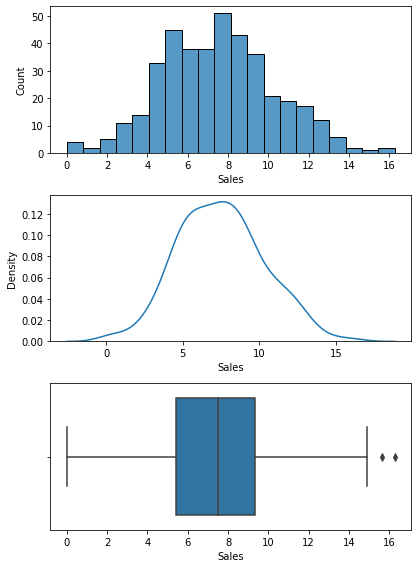

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

In [ ]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격(단위 : 달러)

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


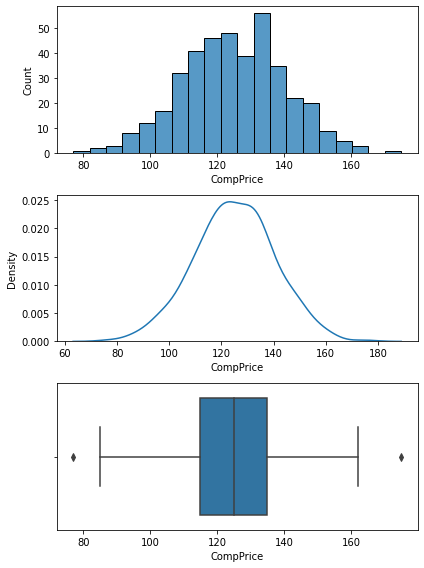

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경쟁사 카시트 가격의 전체 범위는 77 ~  177달러
* 대체로, 100 ~ 130 달러로 형성됨.
* 제품 종류에 가격대가 차이가 있지 않을까? 


5) 추가 분석해 볼 사항이 있나요?

* 자사 가격과 비교 : 
    * 전체 분포 비교
    * 지역별 가격 비교

## (3) Income

In [ ]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


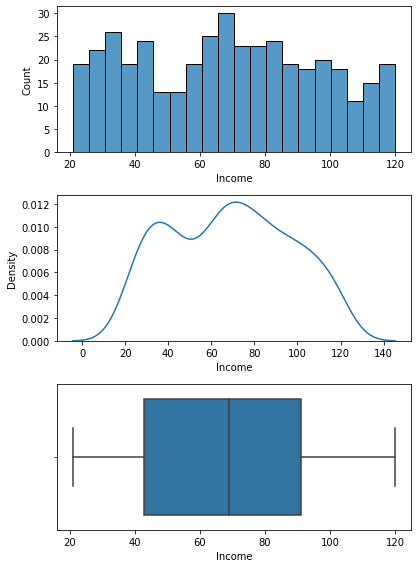

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전 연령에 대한 인구별 평균 소득액? 성인에 대한 평균 소득액?
* 2만달러 ~ 12만 달러 이므로 연간 소득일 것.
* 50%가 약 4만달러 ~ 9만달러

5) 추가 분석해 볼 사항이 있나요?

* 평균 소득과 카시트 판매량과의 관계
* 평균 소득과 카시트 가격과의 관계

## (4) Advertising

In [ ]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


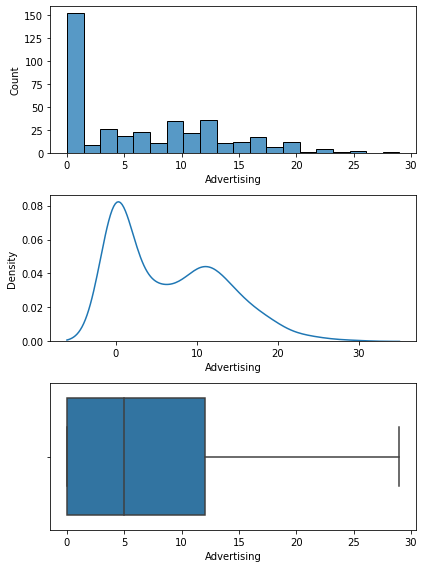

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

In [ ]:
# 광고비 예산이 0 인 지역의 비율.
data.loc[data['Advertising']==0].shape[0] / data.shape[0]

0.36

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 광고비 예산이 0 인 지역이 전체에 36%나 됨. 


5) 추가 분석해 볼 사항이 있나요?

* 광고비 예산 0을 제외하고 분포 확인 필요.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


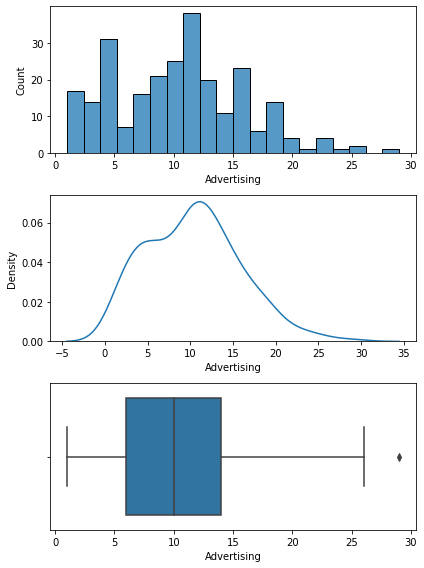

In [ ]:
temp = data.loc[data[var] != 0]

plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(temp[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(temp[var])

plt.subplot(3,1,3)
sns.boxplot(temp[var])

plt.tight_layout()
plt.show()

* 광고비 5천달러 이내와 이후로 분포가 나뉨
* 광고비 0, 5천달러 이내, 5천달러 이상으로 구분하고, 광고비 예산 구분과, 지역, 소득수준, 인구수 등과 비교할 필요 있음

## (5) Population

In [ ]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역 인구수(단위 : 1000명)

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


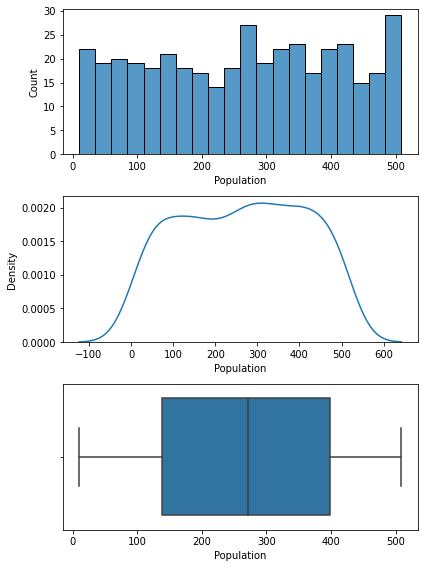

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 인구수가 거의 균등분포를 나타낸다. 왜?

5) 추가 분석해 볼 사항이 있나요?

* 인구수에 따른 판매량 관계
* 인구수와 평균연령의 관계

## (6) Price

In [ ]:
var = 'Price'

1) 변수의 비즈니스 의미

* 자사 지역별 판매가격

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


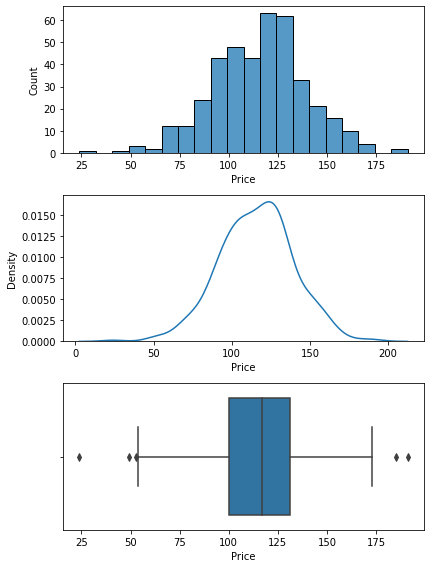

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 가격대가 24 ~ 191 달러로 경쟁사보다 범위가 넓다.
* 50%는 100 ~ 130 사이.

5) 추가 분석해 볼 사항이 있나요?

* 가격에 따라 판매량은 달라질까?
* 자사 가격과 경쟁사 가격 비교

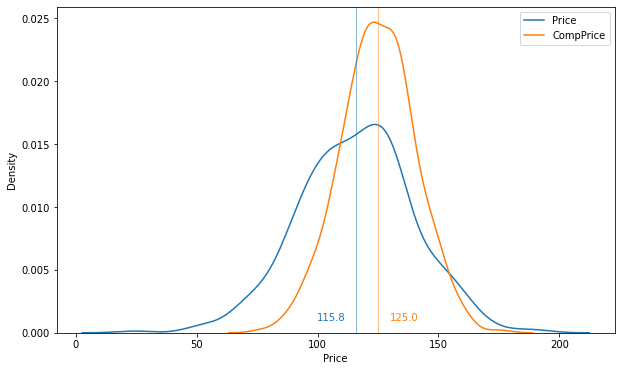

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(data['Price'], label = 'Price')
sns.kdeplot(data['CompPrice'], label = 'CompPrice')

price_mean = round(np.mean(data['Price']),1)
com_mean = round(np.mean(data['CompPrice']),1)

plt.axvline(price_mean, color = 'C0', linewidth = .5)
plt.axvline(com_mean, color = 'C1', linewidth = .5)

plt.text(price_mean-16, 0.001, price_mean, color = 'C0')
plt.text(com_mean+5, 0.001, com_mean, color = 'C1')

plt.legend()
plt.show()

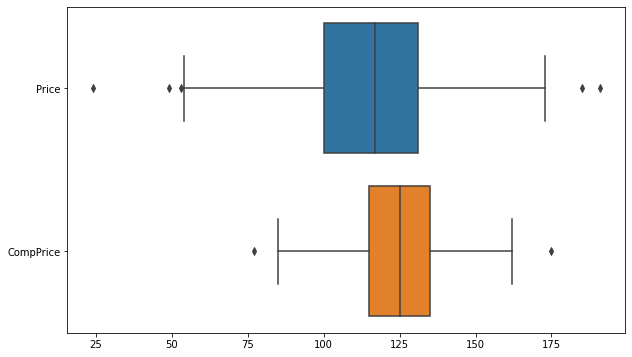

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data=data[['Price','CompPrice']], orient="h")
plt.show()

## (7) Age

In [ ]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령

2) 기초통계량(수치화)

In [ ]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


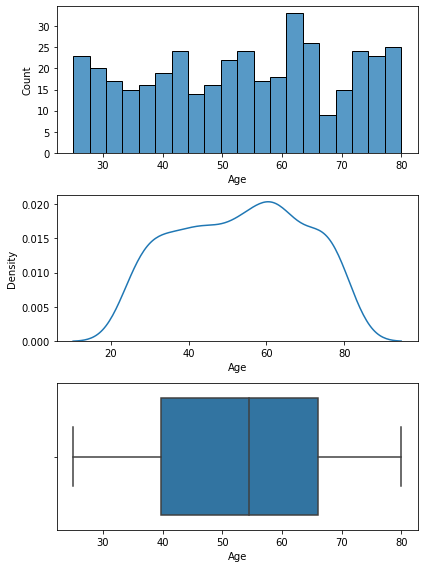

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 지역별 평균나이는 거의 균등분포로 보임.
* 균등분포 ==> 임의로 이렇게 모았거나, 여러 분포가 섞였거나, 이상치를 처리했거나...

* 평균나이
    * 지역 인구 전체에 대한 평균
    * 카시트가 필요한 사람은, 약 10세 이하 자녀를 둔 부모
    * 10세 이하 자녀들과 20대후반 ~ 40세의 부모가 주축인 인구의 평균 나이는?

5) 추가 분석해 볼 사항이 있나요?

* 가장 판매량이 높은 평균나이는?


# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [ ]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [ ]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


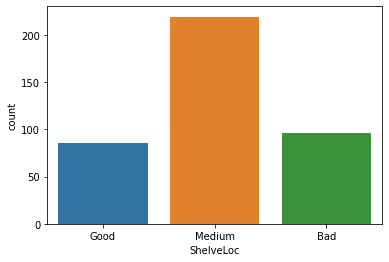

In [ ]:
sns.countplot(data[var], order = ['Good','Medium','Bad'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

In [ ]:
var = 'Urban'

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 기초통계량(수치화)

In [ ]:
# 범주별 빈도수
data[var].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [ ]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Yes    0.705
No     0.295
Name: Urban, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


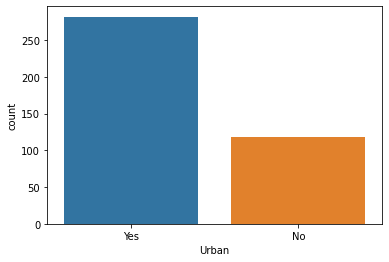

In [ ]:
sns.countplot(data[var], order = ['Yes','No'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 70% 매장이 도시에 있음

5) 추가 분석해 볼 사항이 있나요?

* 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요.

## (3) US

In [ ]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지 여부

2) 기초통계량(수치화)

In [ ]:
# 범주별 빈도수
data[var].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [ ]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Yes    0.645
No     0.355
Name: US, dtype: float64

3) 분포 확인(시각화)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


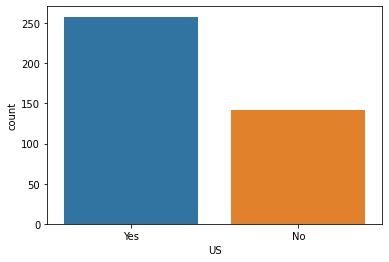

In [ ]:
sns.countplot(data[var], order = ['Yes', 'No'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 65%가 국내(미국)

5) 추가 분석해 볼 사항이 있나요?

* 국내외 와 광고비, 판매가, 경쟁사가격, 매출액 등 비교